<a href="https://colab.research.google.com/github/itzem-vg/1Parcial-IA/blob/main/Presentado/1Final_1P_Regresi%C3%B3n_one_vs_all_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1er Parcial IA

**Estu:** Itzel Emily Velasquez Guerra
**Carrera:** Ing. Diseño y animacion digital

**Enlace del dataset:**  [MNIST Personalizado MNIST](https://www.kaggle.com/datasets/elskowaski/custom-mnist)

El dataset Ya viene dividido en dos archivos, uno de train y otro de test

Al ser un data set en csv las columnas usadas para la realización de la clasificación:

*   **Entrada:**  784 columnas, que tienen los pixeles de las imágenes a escala de grises con valores que van desde el 0 al 255.
*   **Salida:**
Etiqueta que va del 0 al 9,



## Implementacion de librerias necesarias


In [ ]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Manejo de datos
import pandas as pd

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# Librería para realizar gráficos
import matplotlib.pyplot as plt

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline


In [ ]:
# Importación de archivos desde la nube de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 Cargamos los datos de entrenamiento


`input_layer_size  = 784`
En esta linea definimos el tamaño de nuestra imagen, que es el resultado de 28 x 28

------------------------------------------------


`num_labels = 10`
Es la cantidad de etiquetas que contiene nuestro dataset


In [ ]:
# Las imágenes con las que trabajamos son de dígitos de 28x28
input_layer_size  = 784

# Tenemos 10 etiquetas lo cual seria: (0-9)
num_labels = 10

#  Cargamos los datos de entrenamiento
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/train2.csv')

# Asignamos valores a X y Y
X = data.iloc[:20000, 1:785].values
y = data.iloc[:20000, 0].values

m = y.size

# Comprobamos los tamaños
print("Tamaño de X: ", X.shape)
print("Tamaño de Y: ",  y.shape)

#display(data)
data.head()

Tamaño de X:  (20000, 784)
Tamaño de Y:  (20000,)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PUNTO 1 : Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.








`EtiquetaY = data['label'].unique()`

 `data['label']:`  Esta parte selecciona la columna llamada label del DataFrame data. Es como aislar esa columna específica para su análisis.


 `.unique():` Este es un método que opera en una Serie de PANDAS. Identifica todos los valores distintos presentes en esa columna, eliminando cualquier duplicado.

----------------------------------------------
`EtiquetaY = np.sort(EtiquetaY)`

`.sort` es una función de la librería NumPy (np) que se usa para ordenar los elementos de un array.

Por defecto, np.sort ordena los elementos en orden ascendente. Si quisieras ordenarlos en orden descendente, podrías usar np.sort(EtiquetaY)[::-1].

In [ ]:
EtiquetaY = data['label'].unique() #Obtenemos todos los valores unicos de la columna 'label'

#Mostramos la lista de valores unicos y la cantidad de estos
print("Y sin alteracion: ", EtiquetaY)
print("Tamaño de y: ", len( EtiquetaY))
print("-" * 60)

#Ordenamos los valores de manera ascendente
EtiquetaY = np.sort(EtiquetaY) #.sort es una función de NumPy (np).Ordena los elementos de un array.
print("Y ordenado: ", EtiquetaY)

Y sin alteracion:  [5 0 4 1 9 2 3 6 7 8]
Tamaño de y:  10
------------------------------------------------------------
Y ordenado:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
"""Nom_Etiquetas = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
#Nom_Etiquetas[0]
for i in range(10):
  print( "Etiqueta: ",EtiquetaY[i] , " = ",  Nom_Etiquetas[i])"""

'Nom_Etiquetas = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]\n#Nom_Etiquetas[0]\nfor i in range(10):\n  print( "Etiqueta: ",EtiquetaY[i] , " = ",  Nom_Etiquetas[i])'

### Cantidad de datos por cada tipo

`value_counts()` es una función que se usa en Pandas, una librería de Python para el análisis de datos
y retorna un objeto que contiene el conteo de valores únicos en esa Serie.

In [ ]:
conteo_clases = data['label'].value_counts()
print(conteo_clases)


"""conteo_clases = y_sintetico['label'].value_counts()
print(conteo_clases)"""
#df_aumentado

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


"conteo_clases = y_sintetico['label'].value_counts()\nprint(conteo_clases)"

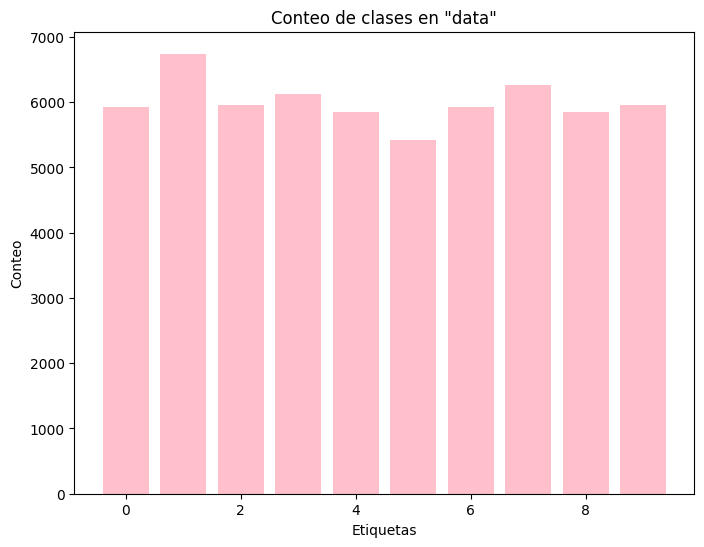

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(conteo_clases.index, conteo_clases.values, color='pink')
plt.title('Conteo de clases en "data"')
plt.xlabel('Etiquetas')
plt.ylabel('Conteo')
plt.show()

## Insertar atributos





In [ ]:
df = pd.DataFrame(data)


`df['Emocion'] = df['label'].map(Emociones)`

* `df['Emocion']:` Accede a la columna "Emocion" del DataFrame df. Si la columna no existe, la crea.

* `df['label']:` Accede a la columna "label" del DataFrame df.

* `.map(Emociones):` El método de PANDAS `.map()` se usa para aplicar una función o mapear valores de una Serie a otra. En este caso, se usa un diccionario Emociones para mapear cada valor de la columna "label" a una emoción.

* `Emociones:` Un diccionario que define la relación entre las etiquetas (números del 0 al 9) y las emociones.

------------------------------------------

```df['Clas_Tamanio'] = np.where(df['label'] <= 4, 'Smll', np.where(df['label'] == 5, 'Medium', 'Large'))```

* `df['label'] <= 4:` Si el valor de la etiqueta es menor o igual que 4, la condición es verdadera.

* `'Smll':` Si la condición es verdadera, se asigna el valor `'Smll'` a la columna "Clas_Tamanio" en la fila correspondiente.
...: Si la condición es falsa, se evalúa la segunda función np.where.

* `np.where(df['label'] == 5, 'Medium', 'Large'):` Esta es la segunda función `np.where` que se evalúa solo si la condición de la primera función es falsa (es decir, si el valor de la etiqueta es mayor que 4).

* `df['label'] == 5:` Esta es la condición. Se evalúa si el valor de la etiqueta es igual a 5.
'Medium': Si la condición es verdadera (etiqueta igual a 5), se asigna el valor 'Medium' a la columna "Clas_Tamanio".
'Large': Si la condición es falsa (etiqueta mayor que 5), se asigna el valor 'Large' a la columna "Clas_Tamanio".

----------------------------------------------------

`df['Is_Par'] = df['label'].apply(lambda x: x % 2 == 0)`

* `lambda` se utiliza para definir una función anónima (una función sin nombre) que se aplica a cada elemento de la columna "label" del DataFrame df.

In [ ]:
# Añadir columna de material (asignación coherente con clases)
Emociones = {
    0: 'Neutralidad', 1: 'Soledad', 2: 'Dudas', 3: 'Optimismo', 4: 'Estabilidad', 5: 'Aventura',
    6: 'Armonía', 7: 'Armonía', 8: 'Infinito', 9: 'Completitud'
}
df['Emocion'] = df['label'].map(Emociones)# Se usa un diccionario Emociones para mapear cada valor de la columna "label" a una emoción.

# Añadir columna de su parentezco con alguna letra del abecedario
Parentezco_Literal = {
    0: 'O', 1: 'I', 2: 'Z', 3: 'E', 4: 'A', 5: 'S',
    6: 'G', 7: 'T', 8: 'B', 9: 'g'
}
df['Literal'] = df['label'].map(Parentezco_Literal)

# Crear la columna 'Clas_Tamanio' usando np.where para hacer las clasificaciones más simples
df['Clas_Tamanio'] = np.where(df['label'] <= 4, 'Smll', #np.where  encuentra los índices de elementos en un array que cumplen una condición determinada.
                       np.where(df['label'] == 5, 'Medium', 'Large'))

# Crear la columna 'EsPar?' usando una función lambda (equivalente a la función es_par)
df['Is_Par'] = df['label'].apply(lambda x: x % 2 == 0) #definir una función anónima

# Mostrar las primeras filas del dataset actualizado
print("\nDataset con Columnas Adicionales:")
print(df.head())


Dataset con Columnas Adicionales:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1      0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2      4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3      1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4      9     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8  ...  pixel778  pixel779  pixel780  pixel781  pixel782  pixel783  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

       Emocion  Literal  Clas_Tamanio  

In [ ]:
#df = pd.DataFrame(data)

## Preprocesamiento de datos
Evitamos que los datos sean de otro tipo numerico

In [ ]:
def convertir_a_numerico(dataset):
    for columna in dataset.columns:
        # Verificar si hay valores nulos en la columna
        if dataset[columna].isnull().any(): # devuelve True si al menos un elemento de un iterable es verdadero
            print(f'Advertencia: La columna "{columna}" contiene valores nulos.')
            # Aquí puedes decidir cómo manejar los nulos, por ejemplo, llenarlos con un valor:
            dataset[columna] = dataset[columna].fillna(np.random.choice([0, 1]))  # Rellenar con -1, puedes cambiarlo a lo que desees

        # Convertir valores no numéricos
        if dataset[columna].dtype == 'object' or dataset[columna].dtype == 'str':
            valores_unicos = {}
            contador = 0
            for valor in dataset[columna]:
                if valor not in valores_unicos:
                    valores_unicos[valor] = contador
                    contador += 1
            dataset[columna] = dataset[columna].map(valores_unicos)

    return dataset

df_aumentado = convertir_a_numerico(df)
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Emocion,Literal,Clas_Tamanio,Is_Par
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,False
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,True
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,2,1,True
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1,False
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,4,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,9,2,True
59996,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,False
59997,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,False
59998,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,7,2,True


## Duplicacion
En este apartado creamos el doble de filas, y llegamos a tener el doble de la cantidad inicial que teniamos

Primero verficamos el tamaño actuaal

In [ ]:
print("Tamaño de X original: ", X.shape)
print("Tamaño de y original: ", y.shape)
#print(df.shape)

Tamaño de X original:  (20000, 784)
Tamaño de y original:  (20000,)


## Creamos la funcion

`duplicar_dataset(X, y, min_val = 0, max_val = 1):`

Como lo dice el nombre sera para crear duplicaciones de las filas aplicando ruido para afectar los valores ya obtenidos

------------------------------------
1.   `X_norm = (X - X.min()) / (X.max() - X.min()) * (max_val - min_val) + min_val:` Normaliza los datos en X al rango especificado por min_val y max_val. La normalización escala los datos para que estén en un rango específico, lo que puede mejorar el rendimiento de algunos algoritmos de aprendizaje automático.
2.   `X_dup = X_norm.copy():` Crea una copia de los datos normalizados en X_norm.
3.   `y_dup = y.copy():`Crea una copia de las etiquetas en y.
4.   `noise = np.random.normal(0, 0.1, X.shape):`Genera ruido aleatorio con una distribución normal.
  * 0: La media de la distribución normal.
  * 0.1: La desviación estándar de la distribución normal.
  * X.shape: La forma del ruido aleatorio, que es la misma que la forma de X.
5.   `X_dup = np.clip(X_dup + noise, 0, 1):`Agrega el ruido aleatorio a los datos duplicados y recorta los valores para que estén entre 0 y 1. Esto asegura que los valores de los píxeles de la imagen estén dentro de un rango válido.
  * `np.clip()` limita los valores de un array.

  Por ejemplo, si tienes un array con valores entre -10 y 10, y quieres que todos los valores estén entre 0 y 5, puedes usar np.clip para truncar los valores fuera de ese rango.

Los valores menores que 0 se convertirán en 0, y los valores mayores que 5 se convertirán en 5.
4.   `X_synthetic = np.vstack((X, X_dup)):` Combina los datos originales X con los datos duplicados X_dup verticalmente.
5.   `y_synthetic = np.concatenate((y, y_dup)):`Combina las etiquetas originales y con las etiquetas duplicadas y_dup.

4.   `return X_synthetic, y_synthetic:`return X_synthetic, y_synthetic: Devuelve los datos sintéticos y las etiquetas.



In [ ]:
def duplicar_dataset(X, y, min_val = 0, max_val = 1):

    #df_copia = df.copy()

    # Normalizar los datos originales
    #X_norm = (X - X.min()) / (X.max() - X.min()) * (max_val - min_val) + min_val

    # Duplicar los datos originales
    X_dup = X_norm.copy()
    y_dup = y.copy()

    # Añadir pequeñas variaciones aleatorias a las imágenes
    noise = np.random.normal(0, 0.1, X.shape)  # Variaciones pequeñas
    """0: La media de la distribución normal.
      0.1: La desviación estándar de la distribución normal.
      X.shape: La forma del ruido aleatorio, que es la misma que la forma de X."""

    X_dup = np.clip(X_dup + noise, 0, 1)  # Asegura valores válidos de píxeles -- limita los valores de un array.
    #0 y 1 recorta nuestro valores

    # Convertir las variaciones a enteros
    #X_dup = np.round(X_dup).astype(int)

    # Concatenar dataset original con el duplicado
    #X_synthetic = np.concatenate((X, X_dup), axis=0). Array
    X_synthetic = np.vstack((X, X_dup)) #concatena verticalmente (añadiendo filas) apilando filas nuevas debajo de las existentes.
    y_synthetic = np.concatenate((y, y_dup)) #concatena los arrays unidimensional, no se necesita especificar el eje.

    return X_synthetic, y_synthetic

Verficamos el tamaño de X-y con los indices

In [ ]:
X_original = df.drop(['label', 'Emocion', 'Literal', 'Clas_Tamanio', 'Is_Par'], axis=1).iloc[:20000].values / 255.0 # Normalización
y_original = df['label'].iloc[:20000].values

print(X_original.shape)
print(y_original.shape)

(20000, 784)
(20000,)


In [ ]:
"""# Convertir todas las columnas excepto 'label' a tipo numérico
for col in df.columns:
    if col != 'label':
        df[col] = pd.to_numeric(df[col], errors='coerce')

X_original = df.drop(['label'], axis=1).iloc[:20000].values / 255.0 # Normalización
y_original = df['label'].iloc[:20000].values

print(X_original.shape)
print(y_original.shape)"""

In [ ]:
X_sintetico, y_sintetico = duplicar_dataset(X_original, y_original)

# Verificamos el tamaño
print(X_sintetico.shape)
print(y_sintetico.shape)

(40000, 784)
(40000,)


In [ ]:
"""print(X_original[:5])          # Muestra las primeras filas del dataset original
print(X_sintetico[27455:27460])"""

## VISUALIZACION

### Visualización de los datos

Creamos la función `displayData(X, example_width=None, figsize=(10, 10)):` , que nos servira para poder representar gráficamente las dimensiones de las imágenes de tamaño 28x28 pixeles.

`example_width = example_width or int(np.round(np.sqrt(n)))`

-----------------------------------------------
`int(np.round(np.sqrt(n))):` Esta expresión calcula la raíz cuadrada del número de elementos (n) en cada ejemplo, la redondea al entero más cercano y la convierte a un entero. Esto se utiliza para determinar el ancho de cada imagen asumiendo que son cuadradas.


In [ ]:
#ORIGINAL
def displayData(X, example_width=None, figsize=(10, 10)):

    X = np.array(X)  # Convertir a arreglo de numpy

    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape # es una matriz
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional - Vector
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m))) #.floor s una función de NumPy, que redondea un número al entero inferior más cercano.
    display_cols = int(np.ceil(m / display_rows)) #redondea un número al entero superior más cercano.

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Check if the index is within bounds
        if i < m:
          #función que cambia la forma de un array sin modificar sus datos.
            ax.imshow(X[i].reshape(example_width, example_width, order='C'),
                      cmap='Greys', extent=[0, 1, 0, 1], aspect='equal', origin='upper')
        ax.axis('off') #Oculta los ejes de la subtrama.

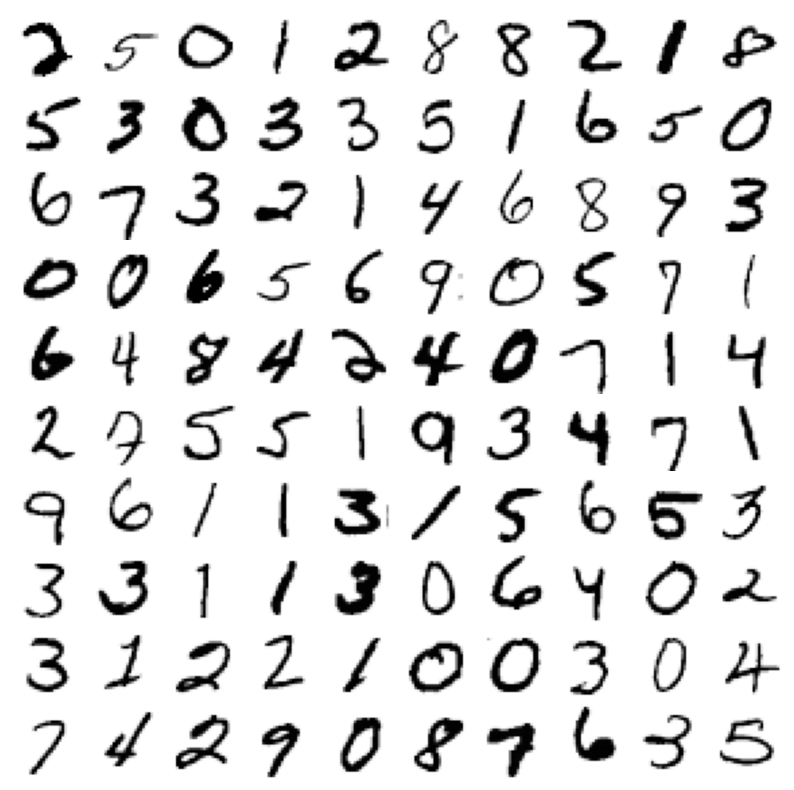

In [ ]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
X_img = X[rand_indices, :]

displayData(X_img)

## Comparacion de datos originales y sistematicos

In [ ]:
labels = data['label']
images = data.drop('label', axis=1).values  # Obtener solo los valores de los píxeles

# Convertir las imágenes a un formato de 28x28
#images_reshaped = images.reshape(-1, 28, 28)

In [ ]:
print("Tamaño de X original: ", X_original.shape)
print("Tamaño de y original: ", y_original.shape)
#print(df.shape)
"""print("Tamaño de X original: ", X.shape)
print("Tamaño de y original: ", y.shape)"""
print("-" * 50)
# Verificamos el tamaño
print("Tamaño de y sintetico: ", X_sintetico.shape)
print("Tamaño de y sintetico: ", y_sintetico.shape)

Tamaño de X original:  (20000, 784)
Tamaño de y original:  (20000,)
--------------------------------------------------
Tamaño de y sintetico:  (40000, 784)
Tamaño de y sintetico:  (40000,)


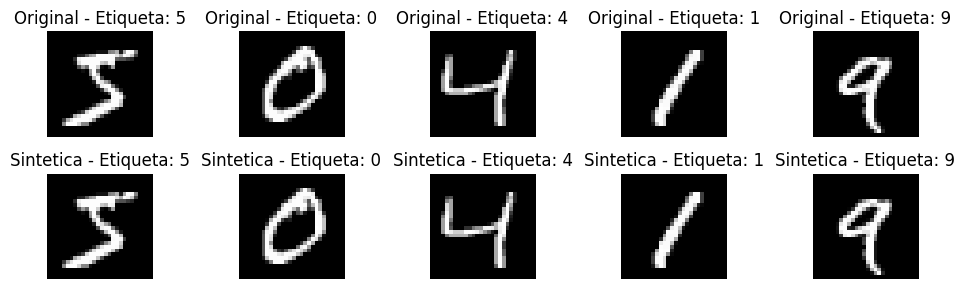

In [ ]:
# Imprimir algunas imágenes originales y rotadas para verificación
num_images = 5  # Número de imágenes a mostrar

plt.figure(figsize=(10, 3))
for i in range(num_images):
    # Mostrar imagen original
    plt.subplot(2, num_images, i + 1)

    # muestra X_original después de remodelarla a 28x28 píxeles y usar un mapa de colores en escala de grises.
    # Reshape the image to 28x28
    plt.imshow(X_original[i].reshape(28, 28), cmap='gray') #.imshow mostrar los datos de imagenes
    plt.title(f'Original - Etiqueta: {labels[i]}')
    #oculta las marcas y etiquetas de los ejes para una visualización más limpia.
    plt.axis('off')

    # Mostrar imagen Sistematica
    plt.subplot(2, num_images, i + 1 + num_images)
    # Reshape the image to 28x28
    plt.imshow(X_sintetico[i].reshape(28, 28), cmap='gray')
    plt.title(f'Sintetica - Etiqueta: {labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Verificar duplicados

In [ ]:
#import pandas as pd # Importa la librería pandas

# Convierte el array NumPy a un DataFrame de Pandas
df_X_sintetico = pd.DataFrame(X_sintetico)

# Ahora puedes usar el método duplicated()
duplicated = df_X_sintetico.duplicated()
print(duplicated)
print ("-" * 50)

duplicated = df_X_sintetico.duplicated().any()

if duplicated:
    print("Hay duplicados en el dataset")
else:
    print("No hay duplicados en el dataset")

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool
--------------------------------------------------
No hay duplicados en el dataset


## Dividimos en 80 20


In [ ]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
m = X_sintetico.shape[0]
train_size = int(m * 0.8)

X_train = X_sintetico[:train_size]
y_train = y_sintetico[:train_size]
X_test = X_sintetico[train_size:]
y_test = y_sintetico[train_size:]

print("Tamanio de X de entrenamiento: ", X_train.shape)
print("Tamanio de y de prueba: ", y_train.shape)
print("-" * 50)
print("Tamanio de X de prueba: ", X_test.shape)
print("Tamanio de y de entrenamiento: ", y_test.shape)

Tamanio de X de entrenamiento:  (32000, 784)
Tamanio de y de prueba:  (32000,)
--------------------------------------------------
Tamanio de X de prueba:  (8000, 784)
Tamanio de y de entrenamiento:  (8000,)


### Normalizacion

In [ ]:
def  featureNormalize(X):
     X_norm = X.copy() #asignamos a una variable la copia
     mu = np.zeros(X.shape[1])
     sigma = np.zeros(X.shape[1])

     mu = np.mean(X, axis = 0)
     sigma = np.std(X, axis = 0)
     X_norm = (X - mu) / sigma

     return  X_norm, mu, sigma

In [ ]:
X_norm, mu, sigma = featureNormalize(X_train)

"""print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)"""

"print(X)\nprint('Media calculada:', mu)\nprint('Desviación estandar calculada:', sigma)\nprint(X_norm)"

In [ ]:
X_train  = X_norm.copy()
print(X_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10308705 0.09118377 ... 0.10856598 0.06940529 0.        ]
 [0.         0.11897601 0.         ... 0.         0.         0.10269205]
 [0.         0.         0.07480221 ... 0.         0.         0.        ]]


In [ ]:
X_test  = X_norm.copy()
print(X_test)

[[-0.36741939 -0.36779232 -0.36417921 ... -0.36954279 -0.37321422
  -0.3684737 ]
 [-0.36741939 -0.36779232 -0.36417921 ... -0.36954279 -0.37321422
  -0.3684737 ]
 [-0.36741939 -0.36779232 -0.36417921 ... -0.36954279 -0.37321422
  -0.3684737 ]
 ...
 [-0.36741939  1.29477744  2.57599964 ...  0.86686517  0.73356993
  -0.3684737 ]
 [ 1.05773446  1.59000218 -0.36417921 ... -0.36954279  2.63063753
  -0.21377806]
 [-0.36741939 -0.36779232  0.75320552 ... -0.36954279 -0.37321422
   1.97622871]]


## Grafica

### TSNE
**t-SNE (t-distributed Stochastic Neighbor Embedding)**

Es una libreria en Python se utiliza para la reducción de dimensionalidad no linea.
es particularmente útil para visualizar datos en 2D o 3D y es excelente para encontrar estructuras no lineales en los datos de alta dimensionalidad.

Se enfoca en mantener la estructura, intenta mantener los puntos de datos que sean algo similares cerca de otros

In [ ]:
from sklearn.manifold import TSNE

Asignamos los valores de x2 y2 que vamos a utilizar, para probar. Por eso no utilizamos nuestras variables originales

In [ ]:
X2 = data.drop(columns=['label']).values
y2 = data['label'].values

`n_components=2:`
 Se especifica que se quiere reducir la dimensionalidad a 2 componentes (2D).

`perplexity=30:` Controla el tamaño de los vecindarios locales. Un valor típico está entre 5 y 50.
n_iter=1000: Número máximo de iteraciones para el algoritmo.

`random_state=42:` Se establece una semilla para la generación de números aleatorios, lo que garantiza resultados reproducibles.

In [ ]:
# encontrar patrones complejo
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne_Org = tsne.fit_transform(X2)

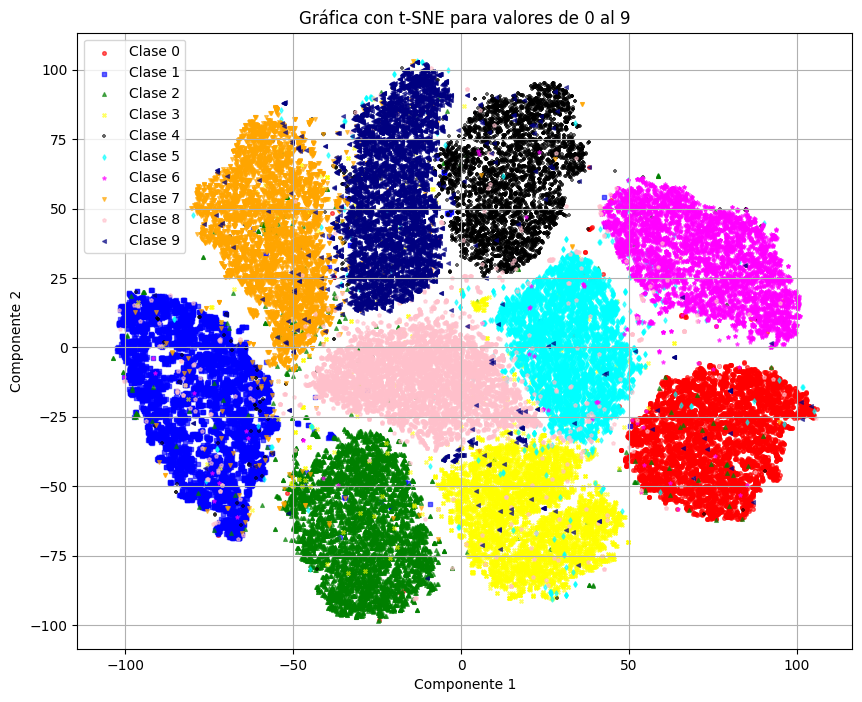

In [ ]:
# Definir los colores y marcadores para las 10 clases
colores = ['red', 'blue', 'green', 'yellow', 'black', 'cyan', 'magenta', 'orange', 'pink', 'navy']  # Asegúrate de tener suficientes colores
marcadores = ['o', 's', '^', 'x', '+', 'd', '*', 'v', 'p', '<']  # Asegúrate de tener suficientes marcadores

# Gráfica para las 10 clases (0 al 9)
plt.figure(figsize=(10, 8))
for clase in np.unique(y2):
    plt.scatter(X_tsne_Org[y2 == clase, 0], X_tsne_Org[y2 == clase, 1],
                label=f'Clase {clase}', alpha=0.6, s=7,
                c=colores[clase], marker=marcadores[clase])

plt.title('Gráfica con t-SNE para valores de 0 al 9')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()


### PASO 5 "Entrenamiento"-- Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el número de clases que se vinculan al dataset elegido.



#### Vectorización de la funcion de costo
Para esta vectorizacion creamos la función de la sigmoide.

La función sigmoide toma un valor de entrada z (que puede ser un número o un array) y lo transforma en un valor de salida entre 0 y 1. La fórmula matemática es: `1.0 / (1.0 + np.exp(-z))`




* Función sigmoide se utiliza como función de activación en clasificación binaria.

In [ ]:
# convertir cualquier valor de entrada en un valor de salida entre 0 y 1.
def sigmoid(z):

    #z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

La función de costo utilizada es `lrCostFunction`, que calcula el costo y la gradiente de la regresión logística regularizada.

`J:` El costo de la regresión logística regularizada. Este valor representa qué tan bien se ajusta el modelo a los datos de entrenamiento, teniendo en cuenta la regularización.

`grad:` El gradiente de la función de costo. Este valor indica la dirección en la que se deben ajustar los parámetros del modelo (theta) para minimizar el costo.



In [ ]:
#Funcion de costo y gradiente REVISAR VALORES DE X-Y
def lrCostFunction(theta, X, y, lambda_):
    m = y.size #num ejemplos

    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    #calcula el producto punto entre las características (X) y los parámetros del modelo (theta).
    h = sigmoid(X.dot(theta.T))

    # Evitar valores de h que sean 0 o 1
    #recortar los valores de h (la hipótesis)
    epsilon = 1e-10
    h = np.clip(h, epsilon, 1 - epsilon) #Asegura que los valores de h estén dentro del rango

    temp = theta.copy()
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    #lambda se refiere al parámetro de regularización.

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad


#### 1.2.3 Vectorización regularizada de la regresión logística

Añadimos regularización a la función de costo.
estas líneas evalúan el rendimiento del modelo de regresión logística con los parámetros y datos proporcionados, y muestran el costo resultante.


## Descenso de la gradiente
 Algoritmo de optimización que se utiliza para encontrar el mínimo de una función.

 Se utiliza para ajustar los parámetros de un modelo con el objetivo de minimizar una función de coste.


 *Este código muestra los gradientes calculados para cada parámetro del modelo, lo que es útil para entender cómo se está actualizando el modelo durante el entrenamiento.*

In [ ]:
# Función de descenso por gradiente
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))  # Asegura que X.dot(theta) sea compatible con np.exp
        #h = np.clip(h, 1e-15, 1 - 1e-15)  # Evitar valores extremos para la función de coste

        gradient = (alpha / m) * np.dot((h - y), X)
        theta = theta - gradient

        J, _ = lrCostFunction(theta, X, y, lambda_)
        J_history.append(J)

    return theta, J_history #epresentan los parámetros de un modelo.

define valores de prueba que podrían usarse luego para probar una implementación vectorizada de la regresión logística.

In [ ]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

In [ ]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo: {:.6f}'.format(J))


Costo: 2.534819


In [ ]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (32000, 784)
Tamaño de y_train: (32000,)
Tamaño de X_test: (8000, 784)
Tamaño de y_test: (8000,)


## Entrenamiento

En **Pandas**, `.unique()` es un método que se utiliza para encontrar los valores únicos en una Serie o en un DataFrame.



In [ ]:
# Parámetros de entrenamiento
alpha = 0.001  # Tasa de aprendizaje
num_iters = 300  # Número de iteraciones
lambda_ = 0.01  # Parámetro de regularización - evitar el sobreajuste

n = X_train.shape[1] # Número de características
all_theta = np.zeros((num_labels, n))
#crea una matriz de ceros que almacenará los parámetros (theta) para cada una de las clases del problema de clasificación multiclase.



# Obtener las clases únicas del dataset

#classes = np.unique(y_train)
classes = np.unique(y_train) [:5]
print(classes)

models = {}  # Diccionario para almacenar los modelos entrenados
cost_histories = {}
# Entrenar un modelo de regresión logística para cada clase (One-vs-All)
# Entrenamiento del modelo con la nueva función sigmoide


[0 1 2 3 4]


En este entrenamiento sacamos con un for el valor de costo de acuerdo a la etiqueta que pertenece

In [ ]:
for contador in classes:
    print(f"Etiqueta: {contador}")
    y_binary = (y_train == contador).astype(int)  # Crear etiquetas binarias
    theta = np.zeros(X_train.shape[1], dtype=np.float64)  # Inicializar theta como array de Numpy con tipo flotante
    theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)
    models[contador] = theta  # Guardar el modelo entrenado
    cost_histories[contador] = cost_history  # Guardar el historial de costos para la clase

    all_theta[contador] = theta

    print(f"Coste final para la etiqueta {contador}: {cost_history[-1]}")
    print("-" * 80)

Etiqueta: 0
Coste final para la etiqueta 0: 0.5880322371161523
--------------------------------------------------------------------------------
Etiqueta: 1
Coste final para la etiqueta 1: 0.5705609934787456
--------------------------------------------------------------------------------
Etiqueta: 2
Coste final para la etiqueta 2: 0.5853384722431695
--------------------------------------------------------------------------------
Etiqueta: 3
Coste final para la etiqueta 3: 0.5874136813213087
--------------------------------------------------------------------------------
Etiqueta: 4
Coste final para la etiqueta 4: 0.5790017403927796
--------------------------------------------------------------------------------


In [ ]:
classes = np.unique(y_train) [5:]
for contador in classes:
    print(f"Etiqueta: {contador}")
    y_binary = (y_train == contador).astype(int)  # Crear etiquetas binarias
    theta = np.zeros(X_train.shape[1], dtype=np.float64)  # Inicializar theta como array de Numpy con tipo flotante
    theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)
    models[contador] = theta  # Guardar el modelo entrenado
    cost_histories[contador] = cost_history  # Guardar el historial de costos para la clase

    all_theta[contador] = theta
    print(f"Coste final para la etiqueta {contador}: {cost_history[-1]}")
    print("-" * 80)

Etiqueta: 5
Coste final para la etiqueta 5: 0.5749192207779295
--------------------------------------------------------------------------------
Etiqueta: 6
Coste final para la etiqueta 6: 0.5837802038494954
--------------------------------------------------------------------------------
Etiqueta: 7
Coste final para la etiqueta 7: 0.5805755109771596
--------------------------------------------------------------------------------
Etiqueta: 8
Coste final para la etiqueta 8: 0.5888842404586152
--------------------------------------------------------------------------------
Etiqueta: 9
Coste final para la etiqueta 9: 0.5837046198277729
--------------------------------------------------------------------------------


GRAFICA

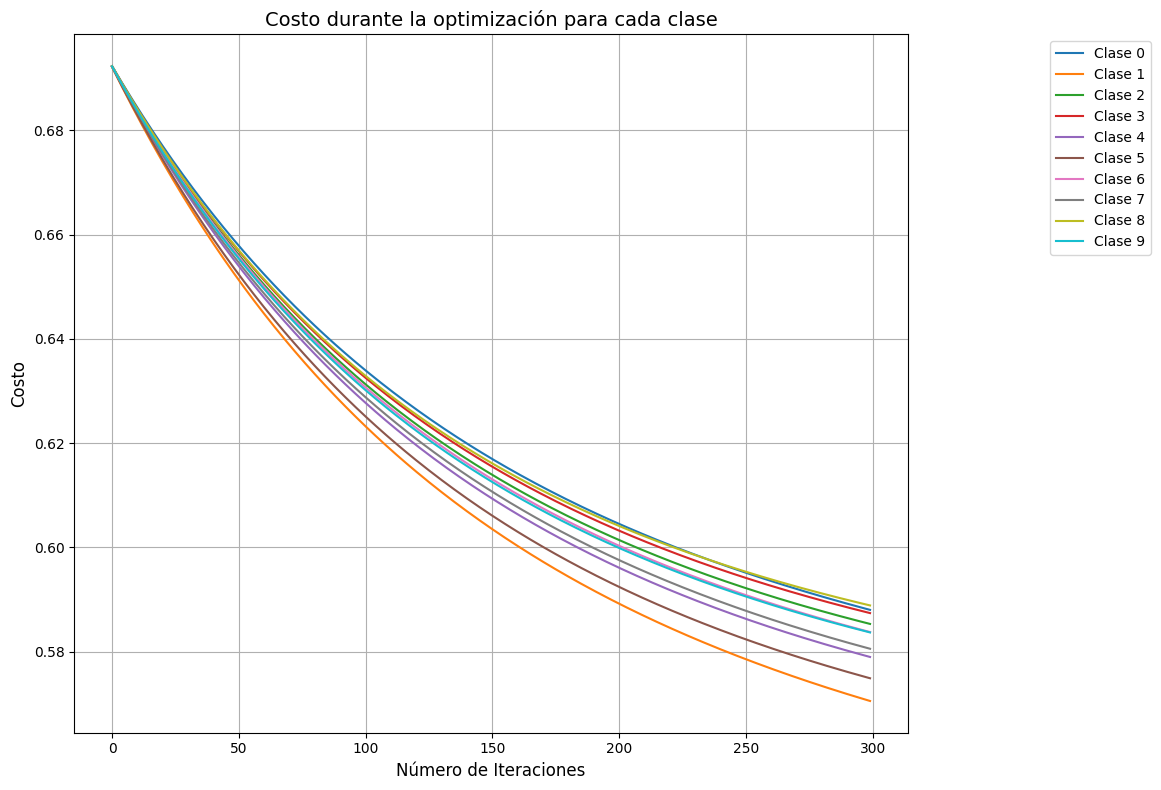

In [ ]:
# Graficar los costos finales para cada clase
plt.figure(figsize=(12, 8))
for c in range(num_labels):
    plt.plot(np.arange(num_iters), cost_histories[c], label=f'Clase {c}')
plt.xlabel('Número de Iteraciones', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.title('Costo durante la optimización para cada clase', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()  # Ajusta el gráfico para que no se superponga
plt.show()

PREDICCIONES

In [ ]:
def predict_binary(theta, X):
    prob = sigmoid(X.dot(theta.T))
    # Predecir la clase: 1 si la probabilidad es mayor o igual a 0.5, de lo contrario 0
    return (prob >= 0.5).astype(int)

In [ ]:
def calculate_binary_accuracy(predictions, actual):
    # Calcular la precisión comparando las predicciones con las etiquetas reales
    return np.mean(predictions == actual) * 100


In [ ]:

# Inicializar variables para las predicciones y la precisión
binary_train_accuracies = []
binary_test_accuracies = []

for c in range(num_labels):
    # Realizar predicciones para los datos de entrenamiento y prueba
    y_pred_train = predict_binary(all_theta[c], X_train)
    y_pred_test = predict_binary(all_theta[c], X_test)

    # Calcular la precisión para los datos de entrenamiento
    accuracy_train = calculate_binary_accuracy(y_pred_train, (y_train == c).astype(int))
    binary_train_accuracies.append(accuracy_train)

    # Calcular la precisión para los datos de prueba
    accuracy_test = calculate_binary_accuracy(y_pred_test, (y_test == c).astype(int))
    binary_test_accuracies.append(accuracy_test)

    # Imprimir la precisión para cada clase en los datos de entrenamiento y prueba
    print(f'Precisión binaria para la clase {c} en los datos de entrenamiento: {accuracy_train:.2f}%')
    print(f'Precisión binaria para la clase {c} en los datos de prueba: {accuracy_test:.2f}%\n')

Precisión binaria para la clase 0 en los datos de entrenamiento: 90.00%
Precisión binaria para la clase 0 en los datos de prueba: 90.15%

Precisión binaria para la clase 1 en los datos de entrenamiento: 88.65%
Precisión binaria para la clase 1 en los datos de prueba: 88.38%

Precisión binaria para la clase 2 en los datos de entrenamiento: 90.30%
Precisión binaria para la clase 2 en los datos de prueba: 90.59%

Precisión binaria para la clase 3 en los datos de entrenamiento: 89.68%
Precisión binaria para la clase 3 en los datos de prueba: 89.40%

Precisión binaria para la clase 4 en los datos de entrenamiento: 90.22%
Precisión binaria para la clase 4 en los datos de prueba: 90.49%

Precisión binaria para la clase 5 en los datos de entrenamiento: 91.18%
Precisión binaria para la clase 5 en los datos de prueba: 90.91%

Precisión binaria para la clase 6 en los datos de entrenamiento: 90.07%
Precisión binaria para la clase 6 en los datos de prueba: 90.46%

Precisión binaria para la clase 7 

##  Historgrama de Precisión Binaria por Clase en Entrenamiento y Prueba

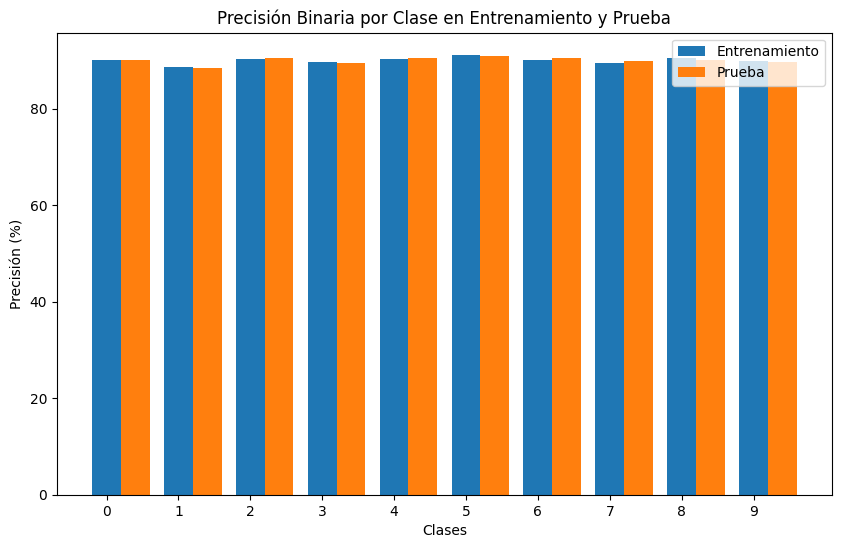

In [ ]:

# Número de clases
num_classes = len(binary_train_accuracies)

# Crear una figura y un conjunto de subgráficos
plt.figure(figsize=(10, 6))

# Definir los valores en el eje x (las clases)
classes = range(num_classes)

# Graficar las precisiones en un histograma
plt.bar(classes, binary_train_accuracies, width=0.4, label='Entrenamiento', align='center')
plt.bar([c + 0.4 for c in classes], binary_test_accuracies, width=0.4, label='Prueba', align='center')

# Etiquetas y título del gráfico
plt.xlabel('Clases')
plt.ylabel('Precisión (%)')
plt.title('Precisión Binaria por Clase en Entrenamiento y Prueba')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.xticks(classes)
plt.show()


In [ ]:
#y_train
print(y_train.shape)

(32000,)


## Insertar dato

In [ ]:
# Función predict_multiclass que utiliza el modelo entrenado
def predict_multiclass(all_theta, X):
    """
    Realiza la predicción de la clase para el conjunto de datos X, usando los
    parámetros entrenados all_theta.

    Args:
    - all_theta: Parámetros entrenados para cada clase.
    - X: Conjunto de datos de características (puede ser una sola imagen o varias).

    Retorna:
    - La clase predicha para cada ejemplo en X.
    """
    # Agregar la columna de 1's (bias term)
    X = np.insert(X, 0, 1, axis=1)


    print(f"Forma de all_theta: {all_theta.shape}")
    print(f"Forma de X: {X.shape}")

    # Calcular el producto de X con los parámetros all_theta
    probabilidades = X.dot(all_theta.T)

    # Predecir la clase con la mayor probabilidad
    return np.argmax(probabilidades, axis=1)



In [ ]:
def predecir_imagen_por_valor(valor, X, y, all_theta):
    """
    Función que toma un valor numérico, lo compara con las etiquetas `y`, predice la clase
    de la imagen asociada y muestra la imagen correspondiente.

    Args:
    - valor: Valor numérico a buscar en `y`.
    - X: Conjunto de datos de características (imágenes en forma de vectores).
    - y: Etiquetas del conjunto de datos.
    - all_theta: Parámetros aprendidos para cada clase (modelo entrenado).

    Retorna:
    - Muestra la imagen predicha para el valor proporcionado.
    """

    # Verificar si el valor proporcionado está en las etiquetas
    if valor not in y:
        print(f"El valor {valor} no se encuentra en el dataset.")
        return

    # Obtener el índice de la primera coincidencia del valor en las etiquetas
    index = np.where(y == valor)[0][0]

    # Obtener la imagen correspondiente a ese índice
    imagen = X[index, :].reshape(28, 28)  # Asumiendo que las imágenes son de 28x28 píxeles

    # Predecir la clase usando los parámetros aprendidos (one-vs-all)
    prediccion = predict_multiclass(all_theta, X[index, :].reshape(1, -1))
    #convertir un array unidimensional en una matriz bidimensional con una sola fila.

    # Mostrar la imagen y la predicción
    plt.imshow(imagen, cmap='gray')
    plt.title(f'Predicción para el valor {valor}: Clase predicha = {prediccion[0]}')
    plt.axis('off')
    plt.show()

Forma de all_theta: (10, 785)
Forma de X: (1, 785)


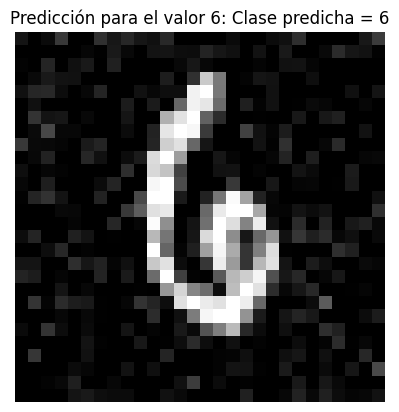

In [ ]:
valor = 6
predecir_imagen_por_valor(valor, X_test, y_test, all_theta)


## ONE vs ALL
*Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el número de clases que se vinculan al dataset elegido.*

CONCEPTO

Entrenar varios clasificadores de regresión logística regularizados, uno para cada clase en el conjunto de datos.

Además, se utilizará una función para visualizar el costo.

También haremos uso de la función para graficar el costo.







In [ ]:
"""def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Añadir columna de unos para el término de sesgo

    cost_histories = [[] for _ in range(num_labels)]  # Lista de listas para almacenar el costo por iteración para cada clase

    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 100, 'disp': False}

        # Función callback para almacenar el costo en cada iteración
        def callback(theta):
            cost, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_histories[c].append(cost)

        #encontrar los parámetros óptimos (theta) para la regresión logística regularizada.
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                args=(X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                callback=callback,  # Usar el callback aquí
                                options=options)

        all_theta[c] = res.x

        print(f'Theta para la clase {c}: {res.x}')

    return all_theta, cost_histories"""

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def lrCostFunction(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, theta))

    # Cálculo del costo con regularización (excepto para theta[0])
    cost = (-1 / m) * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Cálculo del gradiente con regularización (excepto para theta[0])
    grad = (1 / m) * np.dot(X.T, (h - y))
    grad[1:] += (lambda_ / m) * theta[1:]

    return cost, grad

def gradientDescent(X, y, theta, alpha, lambda_, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        cost, grad = lrCostFunction(theta, X, y, lambda_)
        theta -= alpha * grad  # Actualización de los parámetros
        cost_history.append(cost)

    return theta, cost_history



In [ ]:
def oneVsAll(X, y, num_labels, lambda_, alpha=0.01, num_iters=1000):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Añadir columna de unos para el término de sesgo

    cost_histories = [[] for _ in range(num_labels)]  # Lista de listas para almacenar el costo por iteración para cada clase

    for c in range(num_labels):
        initial_theta = np.zeros(n + 1) #sesgo
        #El sesgo es un parámetro adicional que permite al modelo hacer predicciones incluso cuando todas las características son cero.

        # Convertir y a una variable binaria: 1 si es la clase c, 0 si no lo es
        y_c = (y == c).astype(int)

        # Aplicar descenso de gradiente en lugar de optimize.minimize
        theta, cost_history = gradientDescent(X, y_c, initial_theta, alpha, lambda_, num_iters)

        all_theta[c] = theta
        cost_histories[c] = cost_history

        print(f'Theta para la clase {c}: {theta}')

    return all_theta, cost_histories

In [ ]:
#Agragamos valor a lamnda
lambda_ = 0.0001
#Llamamos a la funcion
all_theta, cost_histories  = oneVsAll(X, y, num_labels, lambda_)


Theta para la clase 0: [-4.46487448e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.91684590e-03 -1.16896031e-02 -5.90090884e-03
 -2.45871222e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.24494977e-04 -1.48064490e-02
 -3.78587923e-02 -5.65765751e-02 -4.43096857e-02 -5.50319405e-02
 -1.00371077e-01 -9.02915151e-02 -1.38150717e-01 -2.28355734e-01
  1.98680724e-01  7.99981030e-01  3.67660396e-01 -1.19515016e-01
 -7.47618499e-02 -5.95725532e-02 -2.57836899e-02 -8.07739055e-03
 -4.53665903e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  

#### Gráficar COSTO


In [ ]:
def plot_cost(cost_histories): #Función para graficar la evolución del costo a lo largo de las iteraciones.
    plt.figure(figsize=(12, 8))
    for i in range(num_labels):
        plt.plot(cost_histories[i], label=f'Clase {i}')
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Costo')
    plt.title('Costo durante la optimización para cada clase')
    plt.legend()
    plt.show()

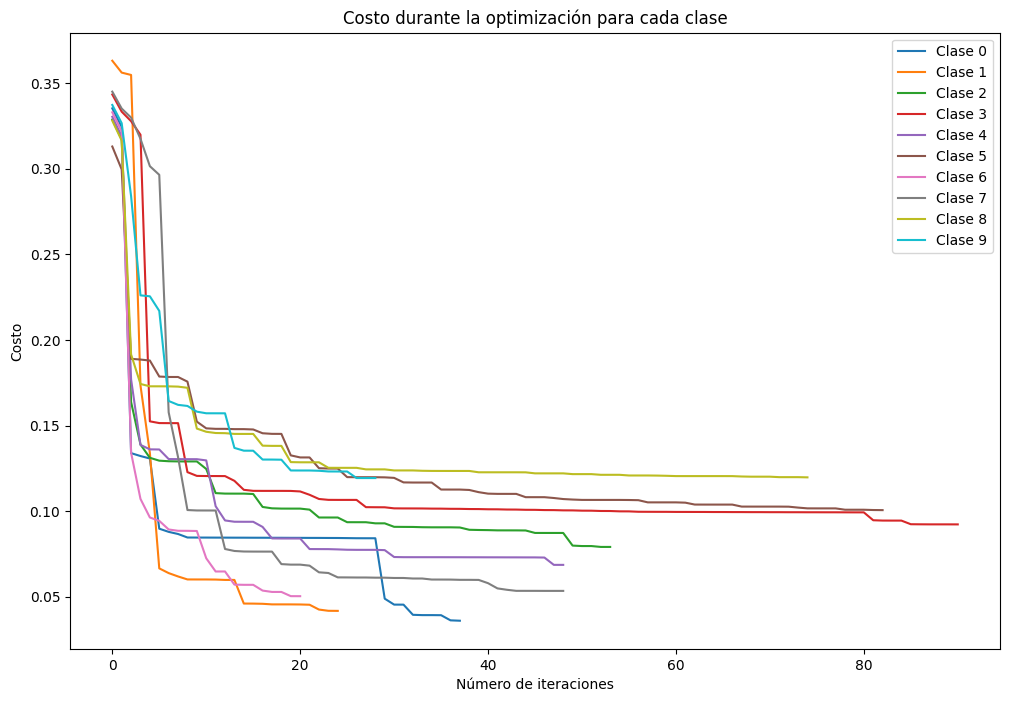

In [ ]:
#Llamamos a la funcion
plot_cost(cost_histories)

### Utilizacion de softmax

In [ ]:
def softmax(z):
    # Restar el máximo de z para evitar desbordamiento numérico
    #z -= np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
def predict_softmax(X, all_theta):
    # Añade una columna de 1
    X = np.c_[np.ones(X.shape[0]), X]
    # Calcula los puntajes para todas las clases usando theta de cada modelo
    z = X.dot(all_theta.T)
    # Aplica softmax para obtener las probabilidades
    probs = softmax(z)
    # Predice la clase con la probabilidad más alta
    return np.argmax(probs, axis=1)

### Prediccion One-vs-all


In [ ]:
#Por cada dato de entrada,calcular la probabilidad de que pertenezca a cada clase usando los clasificadores de regresión logística.

def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Añade una columna de 1
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

# Precisión de entrenamiento y prueba




#### Precisión y predicción


In [ ]:
#Precisión con el 80% de los datos.
pred_train = predictOneVsAll(all_theta, X)
print('Precision del entrenamiento: {:.2f}%'.format(np.mean(pred_train == y) * 100))

Precision del entrenamiento: 90.28%


In [ ]:
#Precisión con el 20% de los datos.
pred_test = predictOneVsAll(all_theta, X_test)
print('Precision de prueba: {:.2f}%'.format(np.mean(pred_test == y_test) * 100))

Precision de prueba: 63.41%


<ipython-input-68-e2edddb86892>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


# PREDICION Y PRECISION CON SOFTMAX

In [ ]:
y_pred = predict_softmax(X_train, all_theta)
print(f"Predicciones usando Softmax: {y_pred[:10]}")

# Calcular la precisión del entrenamiento
accuracy = np.mean(y_pred == y_train) * 100
print(f"Precisión del entrenamiento usando Softmax: {accuracy:.2f}%")


Predicciones usando Softmax: [5 5 5 5 5 5 5 5 5 5]
Precisión del entrenamiento usando Softmax: 33.64%


<ipython-input-103-4bcbeadfd0e7>:4: RuntimeWarning: overflow encountered in exp
  exp_z = np.exp(z)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-103-4bcbeadfd0e7>:5: RuntimeWarning: invalid value encountered in divide
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)


## Entrenamos el modelo 2 veces
Dentro de estas tres veces lo realiza para cada etiqueta

In [ ]:
# Entrenar el modelo por primera vez
all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

Theta para la clase 0: [-2.20794774e+00  5.33706994e-01  4.04577124e-01 -2.00466880e-01
 -5.38406425e-02  4.80064826e-01  1.06626247e-01  2.42353213e-01
 -6.49851369e-01 -5.16136226e-01 -6.48288974e-01 -8.87336255e-01
  1.51632366e+00 -3.05930089e-01 -1.79137327e+00  2.13593888e+00
 -1.02908479e+00  1.05269445e+00 -1.58732734e+00 -7.40435209e-02
 -4.53579652e-01  1.35537351e+00 -5.03059448e-01  1.24506561e-01
 -6.25695797e-01 -4.58803901e-01 -3.60088373e-01  2.17545601e-01
 -2.03114060e-01  6.46228107e-01 -8.20971378e-01  2.66645630e-01
 -1.08808474e+00 -4.39889345e-02 -1.48663295e-02 -8.15768022e-01
  1.07479659e+00  4.61300165e-01  6.91345644e-01 -1.81289577e+00
 -8.00110635e-01  1.47840388e-01 -9.27143428e-01  1.79463002e-01
  1.75971957e+00  2.10149480e+00  1.47513537e+00  1.29623540e+00
  6.07999351e-01 -8.30226324e-01  5.92940975e-01 -3.28770536e-01
  1.98085060e-01  3.37278568e-01 -8.56924649e-01 -1.30820730e+00
 -1.02452840e+00  4.55895588e-01  1.69281709e+00 -3.42494238e-01
  

In [ ]:
# Entrenar el modelo por segunda vez (puedes cambiar parámetros si lo necesitas)
all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

Theta para la clase 0: [-2.20794774e+00  5.33706994e-01  4.04577124e-01 -2.00466880e-01
 -5.38406425e-02  4.80064826e-01  1.06626247e-01  2.42353213e-01
 -6.49851369e-01 -5.16136226e-01 -6.48288974e-01 -8.87336255e-01
  1.51632366e+00 -3.05930089e-01 -1.79137327e+00  2.13593888e+00
 -1.02908479e+00  1.05269445e+00 -1.58732734e+00 -7.40435209e-02
 -4.53579652e-01  1.35537351e+00 -5.03059448e-01  1.24506561e-01
 -6.25695797e-01 -4.58803901e-01 -3.60088373e-01  2.17545601e-01
 -2.03114060e-01  6.46228107e-01 -8.20971378e-01  2.66645630e-01
 -1.08808474e+00 -4.39889345e-02 -1.48663295e-02 -8.15768022e-01
  1.07479659e+00  4.61300165e-01  6.91345644e-01 -1.81289577e+00
 -8.00110635e-01  1.47840388e-01 -9.27143428e-01  1.79463002e-01
  1.75971957e+00  2.10149480e+00  1.47513537e+00  1.29623540e+00
  6.07999351e-01 -8.30226324e-01  5.92940975e-01 -3.28770536e-01
  1.98085060e-01  3.37278568e-01 -8.56924649e-01 -1.30820730e+00
 -1.02452840e+00  4.55895588e-01  1.69281709e+00 -3.42494238e-01
  

In [ ]:
"""# Entrenar el modelo por tercera vez (puedes cambiar parámetros si lo necesitas)
all_theta_3, cost_histories_3 = oneVsAll(X_train, y_train, num_labels, lambda_)"""

### Función personalizada para calcular la precisión

`accuracy = accuracy_score_manual(y_true_class, y_pred_class) * 100` se realiza para convertir la precisión de un valor decimal (entre 0 y 1) a un porcentaje (entre 0% y 100%).

Esto se hace para que la precisión sea más fácil de interpretar y comprender. En lugar de mostrar un valor como 0.85, se muestra como 85%, lo que indica que el modelo tiene una precisión del 85% para esa clase.




In [ ]:
# Función personalizada para calcular la precisión
def accuracy_score_manual(y_true, y_pred):
    correct = sum(y_true == y_pred) #Sum del número total de predicciones correctas.
    total = len(y_true)
    return correct / total

In [ ]:
# Función para calcular la precisión para cada clase
def accuracy_per_class(y_true, y_pred, num_labels):

    #Se crea una lista vacía para almacenar las precisiones de cada clase.
    accuracies = []

    for label in range(num_labels):
        # Filtrar solo las instancias de la clase actual
        y_true_class = (y_true == label)
        y_pred_class = (y_pred == label)
        # Calcular precisión para la clase actual
        accuracy = accuracy_score_manual(y_true_class, y_pred_class) * 100
        accuracies.append(accuracy)
        print(f'Precisión para la clase {label}: {accuracy:.2f}%')
    return accuracies


Tamaño del conjunto de entrenamiento: (32000, 784)
Tamaño del conjunto de prueba: (8000, 784)
Primera precisión global en el conjunto de entrenamiento: 43.32%
Primera precisión global en el conjunto de prueba: 87.58%

Precisión por clase en el conjunto de entrenamiento:
Precisión para la clase 0: 93.75%
Precisión para la clase 1: 44.48%
Precisión para la clase 2: 93.64%
Precisión para la clase 3: 93.09%
Precisión para la clase 4: 93.72%
Precisión para la clase 5: 94.09%
Precisión para la clase 6: 93.70%
Precisión para la clase 7: 93.31%
Precisión para la clase 8: 93.50%
Precisión para la clase 9: 93.33%

Precisión por clase en el conjunto de prueba:
Precisión para la clase 0: 98.89%
Precisión para la clase 1: 98.56%
Precisión para la clase 2: 97.06%
Precisión para la clase 3: 97.08%
Precisión para la clase 4: 97.79%
Precisión para la clase 5: 96.73%
Precisión para la clase 6: 98.55%
Precisión para la clase 7: 97.81%
Precisión para la clase 8: 96.31%
Precisión para la clase 9: 96.38%


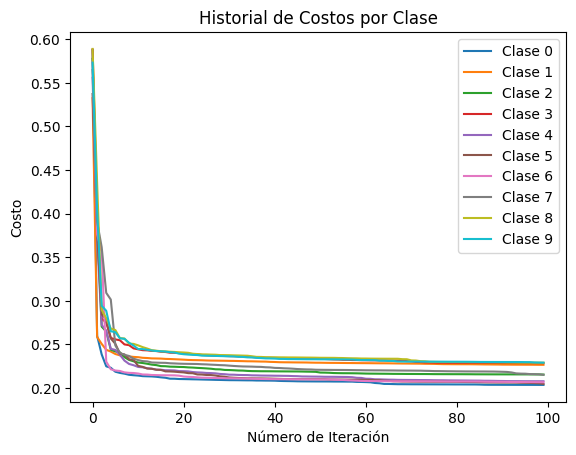

In [ ]:
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

# Entrenar el modelo por primera vez para 10 etiquetas
#all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el conjunto de entrenamiento y prueba
y_pred_train_1 = predictOneVsAll(all_theta_1, X_train)
y_pred_test_1 = predictOneVsAll(all_theta_1, X_test)

# Calcular la precisión GLOBAL en ambos conjuntos usando la función manual
accuracy_train_1 = accuracy_score_manual(y_train, y_pred_train_1) * 100
accuracy_test_1 = accuracy_score_manual(y_test, y_pred_test_1) * 100

print(f'Primera precisión global en el conjunto de entrenamiento: {accuracy_train_1:.2f}%')
print(f'Primera precisión global en el conjunto de prueba: {accuracy_test_1:.2f}%')

# Calcular la precisión por CLASE en el conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento:")
accuracy_per_class(y_train, y_pred_train_1, num_labels)

print("\nPrecisión por clase en el conjunto de prueba:")
accuracy_per_class(y_test, y_pred_test_1, num_labels)

# Graficar el historial de costos para la primera iteración (para las 10 clases)
for i in range(num_labels):  # Aquí i va de 0 a 9
    plt.plot(cost_histories_1[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase')
plt.legend()
plt.show()


Realizando un segundo entrenamiento con nuevos datos...
Segunda precisión global en el conjunto de entrenamiento: 43.21%
Segunda precisión global en el conjunto de prueba: 87.71%

Precisión por clase en el conjunto de entrenamiento (segunda iteración):
Precisión para la clase 0: 93.68%
Precisión para la clase 1: 44.55%
Precisión para la clase 2: 93.60%
Precisión para la clase 3: 93.04%
Precisión para la clase 4: 93.69%
Precisión para la clase 5: 94.03%
Precisión para la clase 6: 93.76%
Precisión para la clase 7: 93.30%
Precisión para la clase 8: 93.47%
Precisión para la clase 9: 93.29%

Precisión por clase en el conjunto de prueba (segunda iteración):
Precisión para la clase 0: 99.02%
Precisión para la clase 1: 98.59%
Precisión para la clase 2: 97.35%
Precisión para la clase 3: 97.06%
Precisión para la clase 4: 97.64%
Precisión para la clase 5: 96.70%
Precisión para la clase 6: 98.46%
Precisión para la clase 7: 97.99%
Precisión para la clase 8: 96.29%
Precisión para la clase 9: 96.33%

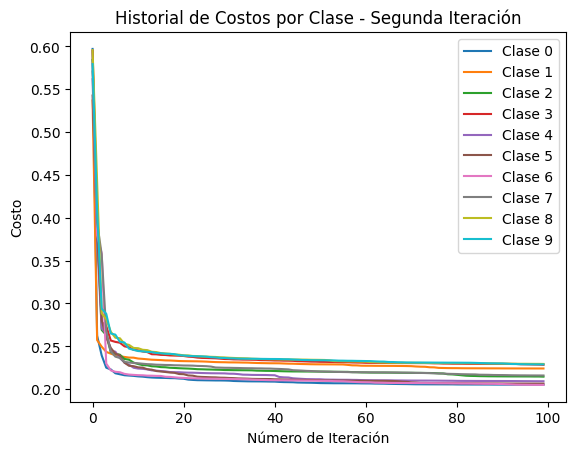

In [ ]:
# Hacer un segundo entrenamiento
print("\nRealizando un segundo entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (para 10 etiquetas)
#all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_2 = predictOneVsAll(all_theta_2, X_train)
y_pred_test_2 = predictOneVsAll(all_theta_2, X_test)

# Calcular la precisión GLOBAL en ambos conjuntos para el segundo entrenamiento usando la función manual
accuracy_train_2 = accuracy_score_manual(y_train, y_pred_train_2) * 100
accuracy_test_2 = accuracy_score_manual(y_test, y_pred_test_2) * 100

print(f'Segunda precisión global en el conjunto de entrenamiento: {accuracy_train_2:.2f}%')
print(f'Segunda precisión global en el conjunto de prueba: {accuracy_test_2:.2f}%')

# Calcular la precisión por clase en el segundo conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento (segunda iteración):")
accuracy_per_class(y_train, y_pred_train_2, num_labels)

print("\nPrecisión por clase en el conjunto de prueba (segunda iteración):")
accuracy_per_class(y_test, y_pred_test_2, num_labels)

# Graficar el historial de costos para la segunda iteración (para las 10 clases)
for i in range(num_labels):  # Nuevamente, i va de 0 a 9
    plt.plot(cost_histories_2[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Segunda Iteración')
plt.legend()
plt.show()

In [ ]:
"""# Hacer un TERCER entrenamiento
print("\nRealizando un tecer entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (para 10 etiquetas)
#all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_3 = predictOneVsAll(all_theta_3, X_train)
y_pred_test_3 = predictOneVsAll(all_theta_3, X_test)

# Calcular la precisión global en ambos conjuntos para el segundo entrenamiento usando la función manual
accuracy_train_3 = accuracy_score_manual(y_train, y_pred_train_3) * 100
accuracy_test_3 = accuracy_score_manual(y_test, y_pred_test_3) * 100

print(f'Tercera precisión global en el conjunto de entrenamiento: {accuracy_train_3:.2f}%')
print(f'Tercera precisión global en el conjunto de prueba: {accuracy_test_3:.2f}%')

# Calcular la precisión por clase en el segundo conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento (tercera iteración):")
accuracy_per_class(y_train, y_pred_train_3, num_labels)

print("\nPrecisión por clase en el conjunto de prueba (tercera iteración):")
accuracy_per_class(y_test, y_pred_test_3, num_labels)

# Graficar el historial de costos para la segunda iteración (para las 10 clases)
for i in range(num_labels):  # Nuevamente, i va de 0 a 9
    plt.plot(cost_histories_3[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Tercera Iteración')
plt.legend()
plt.show()"""

'# Hacer un TERCER entrenamiento\nprint("\nRealizando un tecer entrenamiento con nuevos datos...")\n\n# Entrenar el modelo por segunda vez (para 10 etiquetas)\n#all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)\n\n# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba\ny_pred_train_3 = predictOneVsAll(all_theta_3, X_train)\ny_pred_test_3 = predictOneVsAll(all_theta_3, X_test)\n\n# Calcular la precisión global en ambos conjuntos para el segundo entrenamiento usando la función manual\naccuracy_train_3 = accuracy_score_manual(y_train, y_pred_train_3) * 100\naccuracy_test_3 = accuracy_score_manual(y_test, y_pred_test_3) * 100\n\nprint(f\'Tercera precisión global en el conjunto de entrenamiento: {accuracy_train_3:.2f}%\')\nprint(f\'Tercera precisión global en el conjunto de prueba: {accuracy_test_3:.2f}%\')\n\n# Calcular la precisión por clase en el segundo conjunto de entrenamiento y prueba\nprint("\nPrecisión por clase en el conjunto de entre